In [1]:
import sys; sys.path.append("..")
from utils import count_down

# Pandas -- Series and DataFrames

Main source: https://github.com/jakevdp/PythonDataScienceHandbook/tree/master/notebooks

#### Pandas is a library for fast and efficient computation on big datasets. As in Numpy, many operations in Pandas are vectorized and thus efficient and fast.


Pandas is a newer package built on top of NumPy, and provides an efficient implementation of a DataFrame. DataFrames are essentially multidimensional arrays with attached row and column labels, and often with heterogeneous types and/or missing data. As well as offering a convenient storage interface for labeled data, Pandas implements a number of powerful data operations familiar to users of both database frameworks (-> relational algebra) and spreadsheet programs.

As we saw, NumPy's ndarray data structure provides essential features for the type of clean, well-organized data typically seen in numerical computing tasks. While it serves this purpose very well, its limitations become clear when we need more flexibility (e.g., attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (e.g., groupings, pivots, etc.), each of which is an important piece of analyzing the less structured data available in many forms in the world around us. Pandas, and in particular its Series and DataFrame objects, builds on the NumPy array structure and provides efficient access to these sorts of "data munging" tasks that occupy much of a data scientist's time.

In [2]:
# Just as we import numpy usually as np, we import pandas under the alias of pd. 
# We'll import numpy as well, because we'll need it often when using pandas
import numpy as np
import pandas as pd

## The Pandas Series Object
A Pandas Series is a one-dimensional array of indexed data. It can be created from a list or array as follows:

In [7]:
# missing values 
data = pd.Series([0.25, 0.5, np.NaN, 1.0])
data

0    0.25
1    0.50
2     NaN
3    1.00
dtype: float64

In [4]:
type(data)

pandas.core.series.Series

In [8]:
data.values, type(data.values)

(array([0.25, 0.5 ,  nan, 1.  ]), numpy.ndarray)

In [9]:
#The index is an array-like object of type pd.Index
data.index, type(data.index), list(data.index)

(RangeIndex(start=0, stop=4, step=1),
 pandas.core.indexes.range.RangeIndex,
 [0, 1, 2, 3])

Like with a NumPy array, data can be accessed by the associated index via the familiar Python square-bracket notation:

In [12]:
data[1:3]

1    0.5
2    NaN
dtype: float64

In [13]:
type(data[1])

numpy.float64

In [14]:
print(dir(data))

['T', '_AXIS_ALIASES', '_AXIS_IALIASES', '_AXIS_LEN', '_AXIS_NAMES', '_AXIS_NUMBERS', '_AXIS_ORDERS', '_AXIS_REVERSED', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__div__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__long__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdiv__', '__rdiv

### Series as generalized NumPy array

From what we've seen so far, it may look like the Series object is basically interchangeable with a one-dimensional NumPy array. The essential difference is the presence of the index: while the Numpy Array has an implicitly defined integer index used to access the values, the Pandas Series has an explicitly defined index associated with the values.

This explicit index definition gives the Series object additional capabilities. For example, the index need not be an integer, but can consist of values of any desired type. For example, if we wish, we can use strings as an index:

In [15]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'd', 'c'])
data

a    0.25
b    0.50
d    0.75
c    1.00
dtype: float64

In [17]:
data.index = list("AbCD")
data

A    0.25
b    0.50
C    0.75
D    1.00
dtype: float64

In [19]:
data["b"] == data[1] == data.values[1]

True

In [21]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[3, 7, 2, 4])
data

3    0.25
7    0.50
2    0.75
4    1.00
dtype: float64

In [22]:
data.index

Int64Index([3, 7, 2, 4], dtype='int64')

When an explicit index is present, it is preferred! (*as long as we don't slice!*)

In [23]:
data[3]

0.25

In [24]:
data[1:3]

7    0.50
2    0.75
dtype: float64

In [25]:
type(data[3])

numpy.float64

Note that explicit indices don't need to be unique!

In [26]:
d2 = pd.concat([data, data])
d2

3    0.25
7    0.50
2    0.75
4    1.00
3    0.25
7    0.50
2    0.75
4    1.00
dtype: float64

In [27]:
d2[7]

7    0.5
7    0.5
dtype: float64

In [28]:
d2[7] = 2

In [29]:
d2

3    0.25
7    2.00
2    0.75
4    1.00
3    0.25
7    2.00
2    0.75
4    1.00
dtype: float64

### Series as specialized dictionary

In this way, you can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and a Series is a structure which maps typed keys to a set of typed values. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain operations.

The Series-as-dictionary analogy can be made even more clear by constructing a Series object directly from a Python dictionary:

In [30]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [31]:
population['Texas']

26448193

Unlike a dictionary, though, the Series also supports array-style operations such as slicing:

In [32]:
population['California':'Illinois']
# note that Illinois is included!

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

### Constructing Series objects

In [33]:
# data can be a scalar
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [34]:
# data can be a dictionary, 
ser = pd.Series({2:'a', 1:'b', 3:'c'})
ser

2    a
1    b
3    c
dtype: object

In [35]:
ser.to_dict()

{2: 'a', 1: 'b', 3: 'c'}

In [37]:
list(ser.values)

['a', 'b', 'c']

## The Pandas DataFrame Object

The next fundamental structure in Pandas is the DataFrame. Like the Series object, it can be thought of either as a generalization of a NumPy array, or as a specialization of a Python dictionary. We'll now take a look at each of these perspectives.

### DataFrame as a generalized NumPy array

If a Series is an analog of a one-dimensional array with flexible indices, a DataFrame is an analog of a two-dimensional array with both flexible row indices and flexible column names. Just as you might think of a two-dimensional array as an ordered sequence of aligned one-dimensional columns, you can think of a DataFrame as a sequence of aligned Series objects. Here, by "aligned" we mean that they share the same index.



To demonstrate this, let's first construct a new Series listing the area of each of the five states discussed in the previous section:

In [38]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Now that we have this along with the population Series from before, we can use a dictionary to construct a single two-dimensional object containing this information:

In [42]:
states = pd.DataFrame({'population': population,
                       'area': area,
                       'country': 'USA'})
states

,population,area,country
California,38332521,423967,USA
Texas,26448193,695662,USA
New York,19651127,141297,USA
Florida,19552860,170312,USA
Illinois,12882135,149995,USA


In [43]:
print(states.dtypes)

population     int64
area           int64
country       object
dtype: object


This looks like a generalized dictionary! The keys are the names of the state, and the values are like a list [area, country, population]

In [44]:
states.sort_values(by="population", ascending=False)

,population,area,country
California,38332521,423967,USA
Texas,26448193,695662,USA
New York,19651127,141297,USA
Florida,19552860,170312,USA
Illinois,12882135,149995,USA


In [45]:
states['population'], type(states['population'])

(California    38332521
 Texas         26448193
 New York      19651127
 Florida       19552860
 Illinois      12882135
 Name: population, dtype: int64,
 pandas.core.series.Series)

In [46]:
states["population"].idxmax() #figures out the "key(s)"(indices) of the DataFrame where "population" has its max

'California'

In [47]:
states.loc[states["population"].idxmax()] #returnes the series at the given index

population    38332521
area            423967
country            USA
Name: California, dtype: object

In [48]:
states.max() #returns the max for every individual column!

population    38332521
area            695662
country            USA
dtype: object

In [52]:
states['California']

KeyError: 'California'

In [51]:
states.loc['California']

population    38332521
area            423967
country            USA
Name: California, dtype: object

In [53]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [54]:
states.columns

Index(['population', 'area', 'country'], dtype='object')

In [55]:
states.values

array([[38332521, 423967, 'USA'],
       [26448193, 695662, 'USA'],
       [19651127, 141297, 'USA'],
       [19552860, 170312, 'USA'],
       [12882135, 149995, 'USA']], dtype=object)

In [56]:
type(states.values)

numpy.ndarray

Thus the DataFrame can be thought of as a generalization of a two-dimensional NumPy array, where both the rows and columns have a generalized index for accessing the data.

## DataFrame as specialized dictionary

Similarly, we can also think of a DataFrame as a specialization of a dictionary. Where a dictionary maps a key to a value, a DataFrame maps a column name to a Series of column data. For example, asking for the 'area' attribute returns the Series object containing the areas we saw earlier:

In [58]:
states["area"]
# note that indexing a DataFrame with square brackets gets the *column*!

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [59]:
type(states["area"])

pandas.core.series.Series

### Constructing DataFrame objects

A Pandas DataFrame can be constructed in a variety of ways:

#### From a single Series object

A DataFrame is a collection of Series objects, and a single-column DataFrame can be constructed from a single Series:

In [61]:
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [62]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From multiple Series

In [67]:
s1 = pd.Series(['100', '200', 'python', '300.12', '400'])
s2 = pd.Series(['10', '20', 'php', '30.12', '40'])
df = pd.concat([s1, s2], axis='columns')
df

,0,1
0,100,10
1,200,20
2,python,php
3,300.12,30.12
4,400,40


Note that many functions in pandas take the `axis` argument - In which case you can select between 0/`index` and  1/`columns`. If you want to be explicit, I recommend using the string-version!

#### From a list of dicts 

Any list of dictionaries can be made into a DataFrame. We'll use a simple list comprehension to create some data. Even if some keys in the dictionary are missing, Pandas will fill them in with NaN (i.e., "not a number") values:

In [68]:
df = pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}], index=["first_dict", "second_dict"])
df

,a,b,c
first_dict,1.0,2,NaN
second_dict,NaN,3,4.0


As every single column must have a consistent dtype and np.NaN is a float, some of the numbers get coerced into floats:

In [69]:
df['a']

first_dict     1.0
second_dict    NaN
Name: a, dtype: float64

In [70]:
df['b']

first_dict     2
second_dict    3
Name: b, dtype: int64

In [71]:
type(np.NaN)

float

In [72]:
df.dtypes

a    float64
b      int64
c    float64
dtype: object

If we wanted to get the rows, pandas would need to coerce the numbers explicitly: 

In [73]:
df

,a,b,c
first_dict,1.0,2,NaN
second_dict,NaN,3,4.0


In [74]:
df.loc['first_dict']

a    1.0
b    2.0
c    NaN
Name: first_dict, dtype: float64

#### From a two-dimensional NumPy array

Given a two-dimensional array of data, we can create a DataFrame with any specified column and index names. If omitted, an integer index will be used for each:


In [75]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.018146,-0.254657,1.042550,1.012208
2013-01-02,-0.602128,0.225907,-1.134797,-0.208867
2013-01-03,-0.040274,0.393635,-0.346114,-2.458045
2013-01-04,-1.125774,-0.352709,1.272193,1.370995
2013-01-05,0.550269,-0.906045,-0.078183,-0.571341
2013-01-06,-0.537461,0.030059,-0.254171,-0.545280


### Exercise

Create a DataFrame from the given dictionary as well as the 'qualifies' list, with the given indices:

In [79]:
exam_data = {
    'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
    'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
    'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    }
qualifies = ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [83]:
df = pd.DataFrame(exam_data, index=labels)
df['qualifies'] = qualifies
df

,name,score,attempts,qualifies
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,NaN,3,no
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


In [84]:
df = pd.DataFrame({**exam_data, **{'qualifies': qualifies}} , index=labels)
df

,name,score,attempts,qualifies
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,NaN,3,no
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


## The Pandas Index Object

We have seen here that both the Series and DataFrame objects contain an explicit index that lets you reference and modify data. This Index object is an interesting structure in itself, and it can be thought of as an immutable array:

In [85]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [86]:
ind[0] = 1

TypeError: Index does not support mutable operations

In [87]:
sr = pd.Series(0, index=ind)
sr

2     0
3     0
5     0
7     0
11    0
dtype: int64

Index objects have a name:

In [88]:
ind.names = ['indexx']
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64', name='indexx')

In [89]:
sr = pd.Series(np.zeros_like(ind), index=ind)
sr

indexx
2     0
3     0
5     0
7     0
11    0
dtype: int64

In [90]:
df = pd.DataFrame(np.zeros_like(ind), index=ind, columns=['first'])
df

,first
indexx,
2,0
3,0
5,0
7,0
11,0


In [92]:
df.index.names = [None]
df

,first
2,0
3,0
5,0
7,0
11,0


Index objects also have many of the attributes familiar from NumPy arrays:

In [93]:
ind.size, ind.shape, ind.ndim, ind.dtype

(5, (5,), 1, dtype('int64'))

While viewing Indices as immutable list is natural, indices also allow for set-operations:

In [94]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [95]:
indA & indB

Int64Index([3, 5, 7], dtype='int64')

In [97]:
indA | indB

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [96]:
indA ^ indB

Int64Index([1, 2, 9, 11], dtype='int64')

# Data Indexing, Selection, and Assignment


From the numpy lecture, we already know about indexing, slicing, masking, and fancy indexing:

In [98]:
a = np.arange(16).reshape(4,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [99]:
a[:, [1, 3]][a[:, [1, 3]] % 3 == 0]
# Takes those values of the second and fourth column that are divisible by 3

array([ 3,  9, 15])

Here we'll look at similar means of accessing and modifying values in Pandas Series and DataFrame objects. The corresponding patterns in Pandas are very similar to those of numpy, though there are a few quirks to be aware of.

We'll start with the simple case of the one-dimensional Series object, and then move on to the slightly more complicated two-dimensional DataFrame object.

## Data Selection in Series

As we saw in the previous section, a Series object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary. If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays.

### Series as dictionary

Like a dictionary, the Series object provides a mapping from a collection of keys to a collection of values, which means most of the corresponding functions work just as well for them:

In [100]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [101]:
data.__contains__('b')

True

In [102]:
'b' in data

True

In [103]:
np.array_equal(data.keys(), data.index)

True

In [104]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [106]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [107]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

### Series as one-dimensional array

Series builds on this dictionary-like interface and provides array-style item selection via the same basic mechanisms as NumPy arrays – that is, slices, masking, and fancy indexing. Examples of these are as follows:

In [108]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [109]:
# slicing by implicit integer index
data[0:2] 
# Note that when slicing with an explicit index (i.e., data['a':'c']), the final index is included in the slice, 
# while when slicing with an implicit index (i.e., data[0:2]), the final index is excluded from the slice.

a    0.25
b    0.50
dtype: float64

In [112]:
(data > 0.3) & (data < 0.8)

a    False
b     True
c     True
d    False
e    False
dtype: bool

In [113]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [114]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

In [115]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[1, 2, 3, 4])
data

1    0.25
2    0.50
3    0.75
4    1.00
dtype: float64

In [116]:
data[1:3]

2    0.50
3    0.75
dtype: float64

**If your Series has an explicit integer index, an indexing operation such as data[1] will use the explicit indices, while a slicing operation like data[1:3] will use the implicit Python-style index.**

In [118]:
data = pd.Series(['a', 'b', 'c'], index=[1, 5, 3])
data

1    a
5    b
3    c
dtype: object

In [119]:
# explicit index when indexing
data[1]

'a'

In [120]:
# implicit index when slicing
data[1:3]

5    b
3    c
dtype: object

The **loc** attribute allows indexing and slicing that *always* references the explicit index:

In [121]:
data.loc[1]

'a'

In [122]:
data.loc[1:3]

1    a
5    b
3    c
dtype: object

Note that `loc` may or may not throw Index-Errors when slicing:

In [123]:
data = pd.Series(['a', 'b', 'c'], index=[1, 5, 3])
data

1    a
5    b
3    c
dtype: object

In [ ]:
data.loc['a':'z']

In [ ]:
data.loc[3:10]

In [127]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data.loc[3:10]

3    b
5    c
dtype: object

In [128]:
data.loc['a':'z']

Series([], dtype: object)

The **iloc** attribute allows indexing and slicing that always references the implicit Python-style index:

In [130]:
data.iloc[1]

'b'

In [131]:
data.iloc[1:3]

3    b
5    c
dtype: object

Please, save yourself the pain and be always explicit about what you do -- always use ``.loc`` and ``.iloc``

In [132]:
%%bash
python -c "import this" | grep "Explicit"
#not saying that explicit indices are better than implicit ones, but that you should be explicit about what you're doing.

Explicit is better than implicit.


### Addendum: Indexing

From [the docs][1]: In prior versions, using .loc[list-of-labels] would work as long as at least 1 of the keys was found (otherwise it would raise a KeyError). This behavior is deprecated now!

[1]: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike

In [133]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [ ]:
s.loc[[1, 2, 3]]

instead, you should go for [`reindex`][1], which conforms the Series/DF to new index with optional filling logic.

[1]: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reindex.html

In [135]:
s.reindex([1, 2, 3])

1    2.0
2    3.0
3    NaN
dtype: float64

## Data Selection in DataFrame

Recall that a DataFrame acts in many ways like a two-dimensional or structured array, and in other ways like a dictionary of Series structures sharing the same index. These analogies can be helpful to keep in mind as we explore data selection within this structure.

In [136]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop, 'Country':'USA'})
data

,area,pop,Country
California,423967,38332521,USA
Texas,695662,26448193,USA
New York,141297,19651127,USA
Florida,170312,19552860,USA
Illinois,149995,12882135,USA


Note that if we index a DataFrame, we index the **column**!!

In [137]:
# Dictionary-style indexing results in a Series....
print(type(data["area"]))
data["area"]

<class 'pandas.core.series.Series'>


California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [140]:
# We can also dereference, though it leads to side-effects if that's actually also a method...
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [141]:
type(data.values)

numpy.ndarray

With this picture in mind, many familiar array-like observations can be done on the DataFrame itself. For example, we can transpose the full DataFrame to swap rows and columns:

In [142]:
data.T

,California,Texas,New York,Florida,Illinois
area,423967,695662,141297,170312,149995
pop,38332521,26448193,19651127,19552860,12882135
Country,USA,USA,USA,USA,USA


For array-style indexing, Pandas again uses the loc and iloc indexers mentioned earlier. Using the iloc indexer, we can index the underlying array as if it is a simple NumPy array (using the implicit Python-style index), **but the DataFrame index and column labels are maintained in the result**:

In [143]:
#indexing the underlying numpy-array...
data.values[:3, :2]

array([[423967, 38332521],
       [695662, 26448193],
       [141297, 19651127]], dtype=object)

In [144]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [145]:
data

,area,pop,Country
California,423967,38332521,USA
Texas,695662,26448193,USA
New York,141297,19651127,USA
Florida,170312,19552860,USA
Illinois,149995,12882135,USA


In [146]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [147]:
data.loc[:,['area','pop']]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


So, this is how we get a row!

In [148]:
data.loc["California", :]

area         423967
pop        38332521
Country         USA
Name: California, dtype: object

In [150]:
# adding a new column.. (vectorized calculations!)
data['density'] = data['pop'] / data['area']
# we can combine masking with fancy indexing
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


If you want to combine explicit and implicit indexing, you have to chain them:

In [154]:
data.iloc[1:4].loc[:, ['pop', 'density']]

,pop,density
Texas,26448193,38.018740
New York,19651127,139.076746
Florida,19552860,114.806121


**While indexing refers to columns, slicing refers to rows:**

In [156]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [157]:
data['Florida':'Illinois']

,area,pop,Country,density
Florida,170312,19552860,USA,114.806121
Illinois,149995,12882135,USA,85.883763


Again, rather be explicit about your indexing to save yourself from a lot of confusion.

In [ ]:
data['area':'pop']

In [159]:
data.loc[:, 'area':'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Fast access to a single member using **at**

In [160]:
%%timeit
data.loc['Florida', 'pop']

7.39 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [161]:
%%timeit
data.at['Florida', 'pop']

4.53 µs ± 269 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [ ]:
data

|                        |              |                                          |                          |
|------------------------|--------------|------------------------------------------|--------------------------|
| **direct []-access**   |              |                                          |                          |
| One argument,   single | Column       | data['area']                             |                          |
| One argument,   slice  | Row          | data['Florida': 'Illinois']              | slice-top is included    |
| Both arguments         | only MultiInd| -                                        |                          |
| **.loc[]**             |              |                                          |                          |
| One argument,   single | Row          | data.loc['Florida']                      |                          |
| One argument,   slice  | Row          | data.loc['Florida': 'Illinois']          | slice-top  is included   |
| Both arguments, both   | Row, Column  | data.loc['Florida': 'Illinois', 'area']  | slice-top  is included   |
| **.iloc[]**            |              |                                          |                          |
| One argument,   single | Row          | data.iloc[0]                             |                          |
| One argument,   slice  | Row          | data.iloc[0, 2]                          | slice-top  is excluded   |
| Both arguments, both   | Row, Column  | data.iloc[0: 2, 0:3]                     | slice-top  is excluded   |

### Reindexing

In [162]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200, 200, 404, 404, 301],
                  'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
                  index=index)
df

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [163]:
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10', 'Chrome']
df.reindex(new_index)

,http_status,response_time
Safari,404.0,0.07
Iceweasel,NaN,NaN
Comodo Dragon,NaN,NaN
IE10,404.0,0.08
Chrome,200.0,0.02


In [164]:
df.reindex(columns=['http_status', 'user_agent'])

,http_status,user_agent
Firefox,200,NaN
Chrome,200,NaN
Safari,404,NaN
IE10,404,NaN
Konqueror,301,NaN


**Renaming indices** 

In [165]:
df = pd.DataFrame({"a": [1, 2, 3, 4], "b": [2, 5, 7, 8]})
df = df.rename(mapper={'b': 'c'}, axis='columns')
df

,a,c
0,1,2
1,2,5
2,3,7
3,4,8


### Boolean Indexing

In [210]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df['E'] = ["one", "two", "three"] * 2
df

,A,B,C,D,E
2013-01-01,0.986492,-1.591410,2.224104,0.234720,one
2013-01-02,1.057598,0.569736,-1.380833,1.607308,two
2013-01-03,-1.385859,-0.193861,-0.282502,-0.948282,three
2013-01-04,0.132966,0.937583,-1.538717,-1.130930,one
2013-01-05,-0.091071,-0.366253,-0.204477,0.534744,two
2013-01-06,-1.045567,1.586118,-0.397797,-0.356111,three


In [167]:
df['A'] > 0.5

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06     True
Freq: D, Name: A, dtype: bool

In [168]:
df[df['A'] > 0]

,A,B,C,D,E
2013-01-03,0.605050,0.002116,-1.266171,0.616117,three
2013-01-04,0.047559,-0.183762,-1.044426,-2.489750,one
2013-01-05,1.043731,-0.611024,0.645159,0.484907,two
2013-01-06,0.565736,2.106939,-0.483769,1.134079,three


In [170]:
#alternate syntax: `query` - see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html
df.query('A > 0')

,A,B,C,D,E
2013-01-03,0.605050,0.002116,-1.266171,0.616117,three
2013-01-04,0.047559,-0.183762,-1.044426,-2.489750,one
2013-01-05,1.043731,-0.611024,0.645159,0.484907,two
2013-01-06,0.565736,2.106939,-0.483769,1.134079,three


In [211]:
df['E'].isin(['one','two'])

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [212]:
df[df['E'].isin(['one','two'])] = np.NaN
df

,A,B,C,D,E
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.385859,-0.193861,-0.282502,-0.948282,three
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,NaN,NaN
2013-01-06,-1.045567,1.586118,-0.397797,-0.356111,three


In [213]:
pd.isna(df)

,A,B,C,D,E
2013-01-01,True,True,True,True,True
2013-01-02,True,True,True,True,True
2013-01-03,False,False,False,False,False
2013-01-04,True,True,True,True,True
2013-01-05,True,True,True,True,True
2013-01-06,False,False,False,False,False


In [216]:
pd.isna(df).any(axis=1)

2013-01-01     True
2013-01-02     True
2013-01-03    False
2013-01-04     True
2013-01-05     True
2013-01-06    False
Freq: D, dtype: bool

In [217]:
df[~df.isna().any(axis=1)]

,A,B,C,D,E
2013-01-03,-1.385859,-0.193861,-0.282502,-0.948282,three
2013-01-06,-1.045567,1.586118,-0.397797,-0.356111,three


In [218]:
df.dropna(how="any")

,A,B,C,D,E
2013-01-03,-1.385859,-0.193861,-0.282502,-0.948282,three
2013-01-06,-1.045567,1.586118,-0.397797,-0.356111,three


### Exercise

Write a Pandas snippet to get the names and scores of the people where the number of attempts in the examination is greater than 2 as a dict.


In [219]:
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
    'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
    'attempts' : [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
    'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)
df

,name,score,attempts,qualify
a,Anastasia,12.5,1,yes
b,Dima,9.0,3,no
c,Katherine,16.5,2,yes
d,James,NaN,3,no
e,Emily,9.0,2,no
f,Michael,20.0,3,yes
g,Matthew,14.5,1,yes
h,Laura,NaN,1,no
i,Kevin,8.0,2,no
j,Jonas,19.0,1,yes


In [232]:
df[df['attempts'] > 2][['name', 'score']].set_index('name')['score'].to_dict()

{'Dima': 9.0, 'James': nan, 'Michael': 20.0}

## Data assignment

In [233]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},
                  index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


### Assigning columns

In [234]:
df['country'] = 'USA'
df

,temp_c,country
Portland,17.0,USA
Berkeley,25.0,USA


In [236]:
df['temp_c'] <= 18

Portland     True
Berkeley    False
Name: temp_c, dtype: bool

In [235]:
df['too_cold'] = df['temp_c'] <= 18
df

,temp_c,country,too_cold
Portland,17.0,USA,True
Berkeley,25.0,USA,False


These however work in-place. To assign to a new dataframe, use `assign`:

In [237]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},
                  index=['Portland', 'Berkeley'])
df

,temp_c
Portland,17.0
Berkeley,25.0


In [240]:
df2 = df.assign(temp_f=lambda x: x.temp_c * 9 / 5 + 32)
df2

,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


In [242]:
#vectorized version:
df.assign(temp_f=df['temp_c'] * 9 / 5 + 32)

,temp_c,temp_f
Portland,17.0,62.6
Berkeley,25.0,77.0


In [243]:
#multiple assignments simulatenously:
df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
          temp_k=lambda x: (x['temp_f'] +  459.67) * 5 / 9)

,temp_c,temp_f,temp_k
Portland,17.0,62.6,290.15
Berkeley,25.0,77.0,298.15


In [244]:
df

,temp_c
Portland,17.0
Berkeley,25.0


### Row assignment

In [245]:
df.loc['Berkeley', 'temp_c'] = 26.0
df

,temp_c
Portland,17.0
Berkeley,26.0


In [248]:
type(df.loc['Portland'])

pandas.core.series.Series

In [246]:
df.loc['Portland'] = pd.Series({'temp_c': 99})
df

,temp_c
Portland,99.0
Berkeley,26.0


In [249]:
df.loc['Osnabruck', 'temp_c'] = 18
df

,temp_c
Portland,99.0
Berkeley,26.0
Osnabruck,18.0


In [251]:
df = pd.concat([df, df])
df

,temp_c
Portland,99.0
Berkeley,26.0
Osnabruck,18.0
Portland,99.0
Berkeley,26.0
Osnabruck,18.0
Portland,99.0
Berkeley,26.0
Osnabruck,18.0
Portland,99.0


In [252]:
df.loc['Osnabruck', 'temp_c'] = 25
df

,temp_c
Portland,99.0
Berkeley,26.0
Osnabruck,25.0
Portland,99.0
Berkeley,26.0
Osnabruck,25.0
Portland,99.0
Berkeley,26.0
Osnabruck,25.0
Portland,99.0


In [253]:
df.loc['Osnabruck'] = pd.Series({'temp_c': 99})
df

ValueError: shape mismatch: value array of shape (4,) could not be broadcast to indexing result of shape (4,1)

In [255]:
type(df.loc['Osnabruck'])

pandas.core.frame.DataFrame

In [256]:
np.where(df.index == 'Osnabruck')

(array([ 2,  5,  8, 11]),)

In [257]:
df.iloc[np.where(df.index == 'Osnabruck')[0][0]]

temp_c    25.0
Name: Osnabruck, dtype: float64

In [258]:
df.iloc[np.where(df.index == 'Osnabruck')[0][0]] = pd.Series({'temp_c': 99})
df

,temp_c
Portland,99.0
Berkeley,26.0
Osnabruck,99.0
Portland,99.0
Berkeley,26.0
Osnabruck,25.0
Portland,99.0
Berkeley,26.0
Osnabruck,25.0
Portland,99.0


## Pandas indexing

### Multi-Indexing

While Pandas does provide objects that natively handle three-dimensional and four-dimensional data, a far more common pattern in practice is to make use of `hierarchical indexing` (also known as `multi-indexing`) to incorporate multiple index levels within a single index. In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional Series and two-dimensional DataFrame objects.

In [264]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [265]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [266]:
index.names = ['state', 'year']

In [267]:
pop = pop.reindex(index)
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [268]:
pop['California', 2000], pop['California', 2010]

(33871648, 37253956)

In [270]:
pop.iloc[0]

33871648

In [272]:
pop.iloc[1]

37253956

### MultiIndex as extra dimension: stack() and unstack()

You might notice something else here: we could easily have stored the same data using a simple ``DataFrame`` with index and column labels.
In fact, Pandas is built with this equivalence in mind. The ``unstack()`` method will quickly convert a multiply indexed ``Series`` into a conventionally indexed ``DataFrame``:

In [273]:
pop.unstack()

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [274]:
index.names = [None, None]
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [275]:
pop.unstack()

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [520]:
pop.index.names = [None, None]
pop.unstack().T

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [521]:
popdf = pop.unstack(level=0)
popdf

,California,New York,Texas
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [522]:
popdf.stack()

2000  California    33871648
      New York      18976457
      Texas         20851820
2010  California    37253956
      New York      19378102
      Texas         25145561
dtype: int64

### Index setting and resetting

Another way to rearrange hierarchical data is to turn the index labels into columns; this can be accomplished with the ``reset_index`` method.
Calling this on the population dictionary will result in a ``DataFrame`` with a *state* and *year* column holding the information that was formerly in the index.
For clarity, we can optionally specify the name of the data for the column representation:

In [523]:
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [524]:
pop.index.names = ['state', 'year']
print(type(pop))
pop

<class 'pandas.core.series.Series'>


state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [525]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Often when working with data in the real world, the raw input data looks like this and it's useful to build a ``MultiIndex`` from the column values.
This can be done with the ``set_index`` method of the ``DataFrame``, which returns a multiply indexed ``DataFrame``:

In [526]:
pop_df = pop_flat.set_index(['state', 'year'])
pop_df

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [527]:
pop_df.rename_axis([None, None])

population
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [528]:
asdf = pop_df.rename_axis([None, None]).unstack()
asdf

population          
                 2000      2010
California   33871648  37253956
New York     18976457  19378102
Texas        20851820  25145561

In [529]:
asdf.columns

MultiIndex([('population', 2000),
            ('population', 2010)],
           )

In [530]:
asdf["area"] = 999
asdf

population           area
                 2000      2010     
California   33871648  37253956  999
New York     18976457  19378102  999
Texas        20851820  25145561  999

In [531]:
asdf.columns

MultiIndex([('population', 2000),
            ('population', 2010),
            (      'area',   '')],
           )

In [532]:
print(type(asdf["area"]))
asdf["area"]

<class 'pandas.core.series.Series'>


California    999
New York      999
Texas         999
Name: area, dtype: int64

In [533]:
print(type(asdf["population"]))
asdf["population"]

<class 'pandas.core.frame.DataFrame'>


,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [534]:
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [535]:
pop_df2 = pop_flat.set_index('state').rename_axis(None)
pop_df2

,year,population
California,2000,33871648
California,2010,37253956
New York,2000,18976457
New York,2010,19378102
Texas,2000,20851820
Texas,2010,25145561


In [536]:
pop_df

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [537]:
pop_df.reset_index()

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


# Reading Series and DataFrames

In [300]:
%%bash
head Pokemon.csv

#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [301]:
df = pd.read_csv("Pokemon.csv")

Imagine someboy gave you a random dataset. You don't know any of its contents. What are the first steps you do?

In [302]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [303]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [304]:
df["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [305]:
df["Legendary"].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [306]:
#when working with csvs you really want to make sure if you want the first column as index-column!
df = pd.read_csv("Pokemon.csv", index_col=0)
df.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [307]:
df.reset_index().tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [308]:
df.reset_index().drop_duplicates(subset="#").tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [310]:
df = df[df['Name'] != 'Volcanion']
df.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [314]:
no_duplicates = df.reset_index().drop_duplicates(subset="#").reset_index().drop("index", axis=1)  
no_duplicates.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
715,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
717,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [315]:
no_duplicates.set_index("#").to_csv('Pokemon_no_duplicates.csv')
#no_duplicates.to_excel('Pokemon_no_duplicates.xlsx', sheet_name='Sheet1')

In [316]:
%%bash
head Pokemon_no_duplicates.csv

#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,Squirtle,Water,,314,44,48,65,50,64,43,1,False
8,Wartortle,Water,,405,59,63,80,65,80,58,1,False
9,Blastoise,Water,,530,79,83,100,85,105,78,1,False


In [317]:
gen_one = no_duplicates[no_duplicates["Generation"] == 1].set_index("#")
gen_one.tail()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,1,False
149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


In [320]:
first_gen_dict = gen_one["Name"].to_dict()

In [319]:
[str(key)+" : "+str(val) for index, (key, val) in enumerate(first_gen_dict.items()) if index < 9]

['1 : Bulbasaur',
 '2 : Ivysaur',
 '3 : Venusaur',
 '4 : Charmander',
 '5 : Charmeleon',
 '6 : Charizard',
 '7 : Squirtle',
 '8 : Wartortle',
 '9 : Blastoise']

**Documentation!**

There are really really many arguments for this function, suiting all of your needs!

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

# Ufuncs and Aggregation

## Aggregation in Pandas

Aggregations are functions, where one or more dimensions of data are collapsed onto a single value, like the `max`, `sum` or `mean`- functions.

Stat-operations generally *exclude* missing data.

### For Series

In [538]:
a = np.arange(7)
ser = pd.Series(a**2, index=a)
ser

0     0
1     1
2     4
3     9
4    16
5    25
6    36
dtype: int64

In [539]:
ser.sum()
#mean(), median(), min(), max(), ...

91

### For DataFrames

In [540]:
df = pd.DataFrame({'A': a**2,
                   'B': a**3})
df

,A,B
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216


In [541]:
df.mean()

A    13.0
B    63.0
dtype: float64

In [542]:
df.mean(axis=0)

A    13.0
B    63.0
dtype: float64

In [543]:
df.mean(axis='rows')

A    13.0
B    63.0
dtype: float64

In [544]:
df.mean(axis=1)

0      0.0
1      1.0
2      6.0
3     18.0
4     40.0
5     75.0
6    126.0
dtype: float64

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

## Ufuncs


We know Ufuncs already from Numpy: It are vectorized functions that change all values of an array simultaneously. 

Pandas does the same, with a nice twist: for unary operations like negation and trigonometric functions, these ufuncs will *preserve index and column labels* in the output, and for binary operations such as addition and multiplication, Pandas will automatically *align indices* when passing the objects to the ufunc.


This means that keeping the context of data and combining data from different sources –both potentially error-prone tasks with raw NumPy arrays– become essentially foolproof ones with Pandas.

In [545]:
rng = np.random.RandomState(0)
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,5,0,3,3
1,7,9,3,5
2,2,4,7,6


In [546]:
np.exp(df)

,A,B,C,D
0,148.413159,1.000000,20.085537,20.085537
1,1096.633158,8103.083928,20.085537,148.413159
2,7.389056,54.598150,1096.633158,403.428793


### UFuncs: Index Alignment

For binary operations on two ``Series`` or ``DataFrame`` objects, Pandas will align indices in the process of performing the operation.
This is very convenient when working with incomplete data.

In [547]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')
area

Alaska        1723337
Texas          695662
California     423967
Name: area, dtype: int64

In [548]:
population

California    38332521
Texas         26448193
New York      19651127
Name: population, dtype: int64

In [549]:
area.index & population.index

Index(['Texas', 'California'], dtype='object')

In [550]:
area / population

Alaska             NaN
California    0.011060
New York           NaN
Texas         0.026303
dtype: float64

In [551]:
"divide" in dir(pd.DataFrame)

True

In [552]:
popdens = area.divide(population, fill_value=0)
popdens

Alaska             inf
California    0.011060
New York      0.000000
Texas         0.026303
dtype: float64

In [553]:
popdens = popdens.replace([np.inf, -np.inf], np.nan)
popdens.dropna()

California    0.011060
New York      0.000000
Texas         0.026303
dtype: float64

In [554]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,12,1
1,6,7


In [555]:
B = pd.DataFrame(rng.randint(0, 20, (3, 3)),
                 columns=list('ABC'))
B

,A,B,C
0,14,17,5
1,13,8,9
2,19,16,19


In [556]:
A+B

,A,B,C
0,26.0,18.0,NaN
1,19.0,15.0,NaN
2,NaN,NaN,NaN


In [557]:
A.add(B, fill_value=0)

,A,B,C
0,26.0,18.0,5.0
1,19.0,15.0,9.0
2,19.0,16.0,19.0


### More Index-Alignment

In [1]:
df = pd.DataFrame({'a': np.random.randint(3, size=10)}, index=np.arange(1, 20, 2))
df

,a
1,0
3,0
5,1
7,2
9,2
11,2
13,0
15,0
17,0
19,2


Let's add a new column to this DataFrame!

In [2]:
tmp = pd.Series([0]*len(df.index))
tmp

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [3]:
#df['new'] = tmp   #changes the original one
df.assign(new=tmp) #creates a copy

,a,new
1,0,0.0
3,0,0.0
5,1,0.0
7,2,0.0
9,2,0.0
11,2,NaN
13,0,NaN
15,0,NaN
17,0,NaN
19,2,NaN


In [4]:
df.index | tmp.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 13, 15, 17, 19], dtype='int64')

In [5]:
old_aligned, new_aligned = df.align(tmp, axis=0)
old_aligned

,a
0,NaN
1,0.0
2,NaN
3,0.0
4,NaN
5,1.0
6,NaN
7,2.0
8,NaN
9,2.0


In [6]:
new_aligned

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
11    NaN
13    NaN
15    NaN
17    NaN
19    NaN
dtype: float64

In [7]:
old_aligned.assign(new=new_aligned)

,a,new
0,NaN,0.0
1,0.0,0.0
2,NaN,0.0
3,0.0,0.0
4,NaN,0.0
5,1.0,0.0
6,NaN,0.0
7,2.0,0.0
8,NaN,0.0
9,2.0,0.0


In [8]:
tmp = pd.Series([0]*len(df.index), index=df.index)
tmp

1     0
3     0
5     0
7     0
9     0
11    0
13    0
15    0
17    0
19    0
dtype: int64

In [9]:
df['new'] = tmp
df

,a,new
1,0,0
3,0,0
5,1,0
7,2,0
9,2,0
11,2,0
13,0,0
15,0,0
17,0,0
19,2,0


## .agg()

If you want to apply more than one operation (ufunc/aggregation), use `.agg()`:

In [489]:
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,6.0
2,7.0,8.0,9.0
3,NaN,NaN,NaN


In [490]:
df.agg(['sum', 'min'])

,A,B,C
sum,12.0,15.0,18.0
min,1.0,2.0,3.0


In [491]:
#you can also use different aggregations for different columns: 
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
max,NaN,8.0
min,1.0,2.0
sum,12.0,NaN


In [492]:
#also works for ufuncs:
df.agg({'A' : 'exp', 'B' : [np.exp, 'sqrt']})

A            B          
           exp          exp      sqrt
0     2.718282     7.389056  1.414214
1    54.598150   148.413159  2.236068
2  1096.633158  2980.957987  2.828427
3          NaN          NaN       NaN

## apply()

While some ufuncs (like cumsum or exp) are pre-defined by pandas, the method `apply` can be used to run an arbitrary function on all elements of a Series or DataFrame.

In [493]:
a = np.arange(7)
df = pd.DataFrame({'A': a**2,
                   'B': a**3})
df

,A,B
0,0,0
1,1,1
2,4,8
3,9,27
4,16,64
5,25,125
6,36,216


In [494]:
df.cumsum()

,A,B
0,0,0
1,1,1
2,5,9
3,14,36
4,30,100
5,55,225
6,91,441


In [495]:
df.apply(np.cumsum)

,A,B
0,0,0
1,1,1
2,5,9
3,14,36
4,30,100
5,55,225
6,91,441


In [496]:
df["A_cumsum"] = df.cumsum()["A"]
df["B_cumsum"] = df.apply(np.cumsum)["B"]
df

,A,B,A_cumsum,B_cumsum
0,0,0,0,0
1,1,1,1,1
2,4,8,5,9
3,9,27,14,36
4,16,64,30,100
5,25,125,55,225
6,36,216,91,441


Using Lambda-functions, we can combine `apply` with arbitrary functions. Note that the argument of the function is always an entire column of the dataset.

In [497]:
df.apply(lambda x: print(x, end='\n\n'))

0     0
1     1
2     4
3     9
4    16
5    25
6    36
Name: A, dtype: int64

0      0
1      1
2      8
3     27
4     64
5    125
6    216
Name: B, dtype: int64

0     0
1     1
2     5
3    14
4    30
5    55
6    91
Name: A_cumsum, dtype: int64

0      0
1      1
2      9
3     36
4    100
5    225
6    441
Name: B_cumsum, dtype: int64



A           None
B           None
A_cumsum    None
B_cumsum    None
dtype: object

In [498]:
df

,A,B,A_cumsum,B_cumsum
0,0,0,0,0
1,1,1,1,1
2,4,8,5,9
3,9,27,14,36
4,16,64,30,100
5,25,125,55,225
6,36,216,91,441


In [499]:
df['A'] + 1

0     1
1     2
2     5
3    10
4    17
5    26
6    37
Name: A, dtype: int64

In [500]:
df.apply(lambda x: x+1)

,A,B,A_cumsum,B_cumsum
0,1,1,1,1
1,2,2,2,2
2,5,9,6,10
3,10,28,15,37
4,17,65,31,101
5,26,126,56,226
6,37,217,92,442


In [501]:
def my_more_complex_func(ser):
    res = []
    for elem in ser:
        print(elem if elem > 16 else -elem)
        res.append(elem if elem > 16 else -elem)
    return res

In [502]:
df.apply(my_more_complex_func)

0
-1
-4
-9
-16
25
36
0
-1
-4
-9
-16
25
36
0
-1
-8
27
64
125
216
0
-1
-5
-14
30
55
91
0
-1
-9
36
100
225
441


,A,B,A_cumsum,B_cumsum
0,0,0,0,0
1,-1,-1,-1,-1
2,-4,-8,-5,-9
3,-9,27,-14,36
4,-16,64,30,100
5,25,125,55,225
6,36,216,91,441


In [503]:
df

,A,B,A_cumsum,B_cumsum
0,0,0,0,0
1,1,1,1,1
2,4,8,5,9
3,9,27,14,36
4,16,64,30,100
5,25,125,55,225
6,36,216,91,441


In [504]:
df.apply(lambda x: x.max() - x.min())

A            36
B           216
A_cumsum     91
B_cumsum    441
dtype: int64

Note that `apply` works for both DataFrames and Series!

In [505]:
df["A"].apply(lambda x: print(x))

0
1
4
9
16
25
36


0    None
1    None
2    None
3    None
4    None
5    None
6    None
Name: A, dtype: object

In [506]:
df["A_normed"] = df["A"].apply(lambda x: x/df["A"].max())
df

,A,B,A_cumsum,B_cumsum,A_normed
0,0,0,0,0,0.000000
1,1,1,1,1,0.027778
2,4,8,5,9,0.111111
3,9,27,14,36,0.250000
4,16,64,30,100,0.444444
5,25,125,55,225,0.694444
6,36,216,91,441,1.000000


We can even use dictionaries with the apply-function!

In [507]:
z_moves = {"Normal": "Breakneck Blitz", "Fighting": "All-Out Pummeling", "Flying": "Supersonic Skystrike", "Poison": "Acid Downpour", "Ground": "Tectonic Rage", "Rock": "Continental Crush", "Bug": "Savage Spin-Out", "Ghost": "Never-Ending Nightmare",
"Steel": "Corkscrew Crash", "Fire": "Inferno Overdrive", "Water": "Hydro Vortex", "Grass": "Bloom Doom", "Electric": "Gigavolt Havoc", "Psychic": "Shattered Psyche", "Ice": "Subzero Slammer", "Dragon": "Devastating Drake", "Dark": "Black Hole Eclipse", "Fairy": "Twinkle Tackle"}
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [508]:
df["Z-Move"] = df["Type 1"].apply(lambda x:z_moves[x])
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Z-Move
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Bloom Doom
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Bloom Doom
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Bloom Doom
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Bloom Doom
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Inferno Overdrive


Using `apply`, we can also convert a list of Series into a DataFrame, by making the individual columns to Series:

In [509]:
s = pd.Series([ ['Red', 'Green', 'White'], ['Red', 'Black'], ['Yellow']]) 
print(type(s))
s

<class 'pandas.core.series.Series'>


0    [Red, Green, White]
1           [Red, Black]
2               [Yellow]
dtype: object

In [510]:
pd.Series([1, 2, 3])

0    1
1    2
2    3
dtype: int64

In [511]:
df = s.apply(pd.Series)
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,0,1,2
0,Red,Green,White
1,Red,Black,NaN
2,Yellow,NaN,NaN


**Note on speed:**

According to ([1]), `apply()` is twice as fast as looping through a df's `iterrows()`, and 8 times as fast as looping over python lists.

Note however, that while `apply()` is much faster at looping over the rows of your DataFrame/Series (by taking advantage of a number of internal optimizations, such as using iterators in Cython), it still inherently loops through rows. Whatever you're applying, you're still executing it once for every row. So, wherever you can use make use of vectorized Ufuncs, do so - that is far more optimized and parallelized - for ([1]) exchanging the haversine distance formula with it's vectorized counterpart led to a 50-fold-decrease in time!

\(1): https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6


[1]: https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6 

### Exercise

Write a Pandas program to convert Series of lists to one Series.

In [512]:
s = pd.Series([ ['Red', 'Green', 'White'], ['Red', 'Black'], ['Yellow']])
s

0    [Red, Green, White]
1           [Red, Black]
2               [Yellow]
dtype: object

In [513]:
s.apply(pd.Series).stack().reset_index(drop=True)

0       Red
1     Green
2     White
3       Red
4     Black
5    Yellow
dtype: object

# Group-By

## Split-Apply-Combine

While simple operations are already pre-defined by pandas, custom aggregations and operations can be performed via **group-by**. The group-by operation can be described as having the following steps:

* **Splitting** the data into groups based on some criteria (breaking up and grouping depending on the value of a key)
* **Applying** a function to each group independently (aggregation, transformation, filtering, ...)
* **Combining** the results into a data structure

A typical example, for where the *apply* is a summerization aggregation, is illustrated here:

![](split-apply-combine.png)

In [417]:
tmp = np.array([list("ABCABC"), np.arange(1,7)]).T
tmp

array([['A', '1'],
       ['B', '2'],
       ['C', '3'],
       ['A', '4'],
       ['B', '5'],
       ['C', '6']], dtype='<U21')

In [418]:
df = pd.DataFrame(tmp, columns=["key", "data"])
df["data"] = pd.to_numeric(df["data"])
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [419]:
df.groupby("key")

Note that what is returned is not a set of `DataFrames`, but a `DataFrameGroupBy` object. This object is where the magic is: you can think of it as a special view of the `DataFrames`, which is poised to dig into the groups but does no actual computation until the aggregation is applied. This "lazy evaluation" approach means that common aggregates can be implemented very efficiently in a way that is almost transparent to the user.

To produce a result, we can apply an aggregate to this `DataFrameGroupBy` object, which will perform the appropriate apply/combine steps to produce the desired result:

In [421]:
df.groupby("key").sum().reset_index()

,key,data
0,A,5
1,B,7
2,C,9


In [422]:
df.groupby("key")["data"].sum()
# we can do column indexing just like on a normal DataFrame

key
A    5
B    7
C    9
Name: data, dtype: int64

### Iteration over groups

The ``GroupBy`` object supports direct iteration over the groups, returning each group as a ``Series`` or ``DataFrame``:

In [423]:
df

,key,data
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


In [424]:
for (key, _) in df.groupby("key"):
    print(key)
    
print()
for (_, group) in df.groupby("key"):
    print(group, "\n")

A
B
C

  key  data
0   A     1
3   A     4 

  key  data
1   B     2
4   B     5 

  key  data
2   C     3
5   C     6 



In [429]:
pkm = pd.read_csv('Pokemon.csv')
pkm.groupby('Generation')['Total'].mean()

Generation
1    426.813253
2    418.283019
3    436.225000
4    459.016529
5    434.987879
6    436.378049
Name: Total, dtype: float64

### Dispatch methods

Any method not explicitly implemented by the ``GroupBy`` object will be passed through and called on the groups, whether they are ``DataFrame`` or ``Series`` objects.
For example, you can use the ``describe()`` method of ``DataFrame``s to perform a set of aggregations that describe each group in the data:

In [430]:
df.describe()

,data
count,6.000000
mean,3.500000
std,1.870829
min,1.000000
25%,2.250000
50%,3.500000
75%,4.750000
max,6.000000


In [431]:
df.groupby("key").describe()

data                                         
    count mean      std  min   25%  50%   75%  max
key                                               
A     2.0  2.5  2.12132  1.0  1.75  2.5  3.25  4.0
B     2.0  3.5  2.12132  2.0  2.75  3.5  4.25  5.0
C     2.0  4.5  2.12132  3.0  3.75  4.5  5.25  6.0

In [432]:
df = pd.read_csv("Pokemon_no_duplicates.csv", index_col=0)
df.groupby('Generation')["Name"].nunique()

Generation
1    151
2    100
3    135
4    107
5    156
6     71
Name: Name, dtype: int64

### Exercise

The given dataset contains a column `Region` as well as a column `Pop. Density`. Write a snippet that takes as argument the dataframe containing all the countries, and returns a `Series` mapping regions to the average Population density of its countries.

In [449]:
countries = pd.read_csv('countries.csv', index_col=0)
countries.head()

,Country,Subcontinent,Region,In EU,Population,Area,Pop. Density,Coastline,Net migration,Infant mortality,...,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,West & Central Asia,ASIA (EX. NEAR EAST),False,31056997,1.677019e+06,47.96,0.00,23.06,163.07,...,3.22,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,Europe,EASTERN EUROPE,False,3581655,7.445703e+04,124.59,1.26,-4.93,21.52,...,71.20,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,North Africa,NORTHERN AFRICA,False,32930091,6.168683e+06,13.83,0.04,-0.39,31.00,...,78.10,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,Oceania,OCEANIA,False,57794,5.154080e+02,290.42,58.29,-20.71,9.27,...,259.54,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,Europe,WESTERN EUROPE,False,71201,1.212115e+03,152.14,0.00,6.60,4.05,...,497.18,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [454]:
countries.groupby("Region")["Pop. Density"].mean().rename_axis(None).sort_values(ascending=False)

ASIA (EX. NEAR EAST)    1264.819286
WESTERN EUROPE           952.042857
NEAR EAST                427.078750
NORTHERN AMERICA         260.872000
LATIN AMER. & CARIB      136.191778
OCEANIA                  131.182857
EASTERN EUROPE           100.890833
SUB-SAHARAN AFRICA        92.259020
C.W. OF IND. STATES       56.700833
BALTICS                   39.833333
NORTHERN AFRICA           38.935000
Name: Pop. Density, dtype: float64

## Aggregate, filter, transform, apply

So far, we focused on aggregation for the combine operation, but there are more options available.
In particular, ``GroupBy`` objects have ``aggregate()``, ``filter()``, ``transform()``, and ``apply()`` methods that efficiently implement a variety of useful operations before combining the grouped data.

For the purpose of the following subsections, we'll use this ``DataFrame``:

In [455]:
def create_df():
    rng = np.random.RandomState(0)
    df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'data1': range(6),
                       'data2': rng.randint(0, 10, 6)},
                       columns = ['key', 'data1', 'data2'])
    return df
    
df = create_df()
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


### Aggregation

While we used some *aggregation-functions* already, the function `aggregate` is the explicit version thereof.  
It can take a string, a function, or a list thereof, and compute all the aggregates at once.

In [456]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [457]:
df.groupby('key').agg(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

Another useful pattern is to pass a dictionary mapping (old) column names to operations to be applied on that column:

In [458]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [459]:
df.groupby('key').aggregate({'data1': np.sum,
                             'data2': lambda x: np.std(x, ddof=1)})

,data1,data2
key,,
A,3,1.414214
B,5,4.949747
C,7,4.242641


### Named aggregation

To support column-specific aggregation with control over the *output* column names, pandas accepts so-called named aggregation in `GroupBy.agg()`, where:

* The keywords are the output column names
* The values are tuples whose first element is the column to select and the second element is the aggregation to apply to that column. 
    * Alternatively, you can use the pandas.NamedAgg namedtuple with the fields ['column', 'aggfunc'] to make it clearer what the arguments are. 

In [460]:
animals = pd.DataFrame({'kind': ['cat', 'dog', 'cat', 'dog'],
                        'height': [9.1, 6.0, 9.5, 34.0],
                        'weight': [7.9, 7.5, 9.9, 198.0]})
animals

,kind,height,weight
0,cat,9.1,7.9
1,dog,6.0,7.5
2,cat,9.5,9.9
3,dog,34.0,198.0


In [461]:
assert int(pd.__version__[0]) >= 1, 'Your version of pandas is too old for this!'

In [462]:
animals.groupby("kind").agg(
       min_height = pd.NamedAgg(column='height', aggfunc='min'),
       max_height = pd.NamedAgg(column='height', aggfunc='max'),
       average_weight = pd.NamedAgg(column='weight', aggfunc=np.mean),
    )

,min_height,max_height,average_weight
kind,,,
cat,9.1,9.5,8.90
dog,6.0,34.0,102.75


### Filtering

A filtering operation allows you to drop data based on the group properties.
For example, we might want to keep all groups in which the standard deviation is larger than some critical value:

In [463]:
def filter_func(x):
    return x['data2'].std() > 4

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [464]:
df.groupby('key').std()

,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


In [465]:
df.groupby('key').filter(filter_func)
#note that this is not an aggregate - the result has the shape of the original DataFrame, just with certain lines left out!

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


### The apply() method

The ``apply()`` method lets you apply an arbitrary function to the group results.
The function should take a ``DataFrame``, and return either a Pandas object (e.g., ``DataFrame``, ``Series``) or a scalar; the combine operation will be tailored to the type of output returned.

First, remember our ``apply`` from before:

In [479]:
create_df()

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [476]:
df = create_df()
df["data1"] = df["data1"].apply(lambda x: x/df["data1"].max())
df

,key,data1,data2
0,A,0.0,5
1,B,0.2,0
2,C,0.4,3
3,A,0.6,3
4,B,0.8,7
5,C,1.0,9


Keep in mind that ``groupby`` only returns a *view of the original DataFrame*.  
Here is an ``apply()`` that normalizes the (grouped) first column by the sum of the (grouped) second:

In [477]:
import warnings; warnings.filterwarnings('ignore')
try:
    del newdf
except:
    pass

In [478]:
df = create_df()
sums = df.groupby('key')["data2"].sum()
print(sums, '\n\n\n')
for key, group in df.groupby('key'):
    group["data1"] /= sums[key]
    try:
        newdf = newdf.append(group) #appending to dataframes is bad style!
    except:
        newdf = group.copy()
    print(newdf, '\n')

newdf

key
A     8
B     7
C    12
Name: data2, dtype: int64 



  key  data1  data2
0   A  0.000      5
3   A  0.375      3 

  key     data1  data2
0   A  0.000000      5
3   A  0.375000      3
1   B  0.142857      0
4   B  0.571429      7 

  key     data1  data2
0   A  0.000000      5
3   A  0.375000      3
1   B  0.142857      0
4   B  0.571429      7
2   C  0.166667      3
5   C  0.416667      9 



,key,data1,data2
0,A,0.000000,5
3,A,0.375000,3
1,B,0.142857,0
4,B,0.571429,7
2,C,0.166667,3
5,C,0.416667,9


In [480]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [481]:
df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


## Specifying the split key

In the simple examples presented before, we split the ``DataFrame`` on a single column name.
This is just one of many options by which the groups can be defined, and we'll go through some other options for group specification here.

### A list, array, series, or index providing the grouping keys

The key can be any series or list with a length matching that of the ``DataFrame``. For example:

In [482]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [483]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,data1,data2
0,7,17
1,4,3
2,4,7


### A dictionary or series mapping index to group

Another method is to provide a dictionary that maps index values to the group keys:

In [484]:
df2 = df.set_index('key')
df2

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9


In [485]:
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
df2.groupby(mapping).sum()

,data1,data2
consonant,12,19
vowel,3,8


Grouping by multiple columns forms a hierarchical index

In [486]:
df2.groupby([mapping, "key"]).sum()

data1  data2
          key              
consonant B        5      7
          C        7     12
vowel     A        3      8

Video tutorial from Pycon 2015

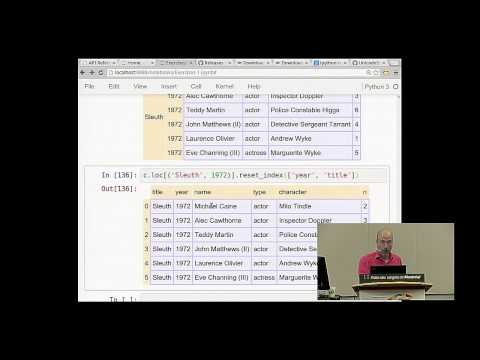

In [487]:
from IPython.display import YouTubeVideo
YouTubeVideo('5JnMutdy6Fw')